In [1]:
import pylab as p
from numpy import *
from scipy import integrate

In [2]:
class RK4(object):

    def __init__(self, *functions):

        """
        Initialize a RK4 solver.
        :param functions: The functions to solve.
        """

        self.f = functions
        self.t = 0


    def solve(self, y, h, n):

        """
        Solve the system ODEs.
        :param y: A list of starting values.
        :param h: Step size.
        :param n: Endpoint.
        """

        t = []
        res = []
        for i in y:
            res.append([])

        while self.t <= n and h != 0:
            t.append(self.t)
            y = self._solve(y, self.t, h)
            for c, i in enumerate(y):
                res[c].append(i)

            self.t += h

            if self.t + h > n:
                h = n - self.t

        return t, res


    def _solve(self, y, t, h):

        functions = self.f

        k1 = []
        for f in functions:
            k1.append(h * f(t, *y))

        k2 = []
        for f in functions:
            k2.append(h * f(t + .5*h, *[y[i] + .5*h*k1[i] for i in range(0, len(y))]))

        k3 = []
        for f in functions:
            k3.append(h * f(t + .5*h, *[y[i] + .5*h*k2[i] for i in range(0, len(y))]))

        k4 = []
        for f in functions:
            k4.append(h * f(t + h, *[y[i] + h*k3[i] for i in range(0, len(y))]))

        return [y[i] + (k1[i] + 2*k2[i] + 2*k3[i] + k4[i]) / 6.0 for i in range(0, len(y))]

In [3]:
class PPSolver():
    def __init__(self, a = .1,b = .05,c=.01,d=0.001,prdtr = 80, prey=40 ):
        self.A1 = a
        self.A2 = b
        self.B1 = c
        self.B2 = d
        self.H = 250
        self.Prdtr = prdtr
        self.Prey = prey
        self.resRK = (0,0)
        self.resSCP = (0,0)
        
    def RK4S(self):
        xdot = lambda t, x, y: self.A1*x - x*y*self.B1
        ydot = lambda t, x, y: self.B2*x*y - self.A2*y

        lv = RK4(xdot, ydot)
        self.resRK = lv.solve([self.Prdtr, self.Prey], .1, self.H)
        #t, y = lv.solve([self.Prdtr, self.Prey], .1, self.H)
        print('RK is Success!')
        self.graphic(self.resRK[0], self.resRK[1])
        
    def SCPS(self):
        a = self.A1
        b = self.B1
        c = self.A2
        d = self.B2
        def dX_dt(X, t=0):
            """ Return the growth rate of fox and rabbit populations. """
            return array([ a*X[0] -   b*X[0]*X[1] ,
                          -c*X[1] + d*X[0]*X[1] ])
        def d2X_dt2(X, t=0):
            """ Return the Jacobian matrix evaluated in X. """
            return array([[a -b*X[1],   -b*X[0]     ],
                          [d*X[1] ,   -c +d*X[0]] ])
        
        t1 = linspace(0, self.H,  (self.H*10)+1)              # time
        X0 = array([self.Prdtr, self.Prey])                     # initials conditions: 10 rabbits and 5 foxes
        X, infodict = integrate.odeint(dX_dt, X0, t1, full_output=True)
        print(infodict['message'])
        self.resSCP = X.T
        self.graphic(t1, self.resSCP)
        
    def graphic(self, t, y):
        f1 = p.figure()
        p.plot(t, y[0], 'r-', label='Rabbits')
        p.plot(t, y[1], 'b-', label='Foxes')
        p.grid()
        p.legend(loc='best')
        p.xlabel('time')
        p.ylabel('population')
        p.title('Evolution of prey and predator populations')
        p.show()

In [4]:
G = PPSolver()

RK is Success!


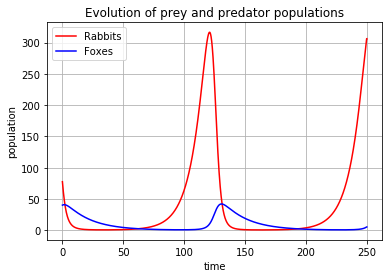

Integration successful.


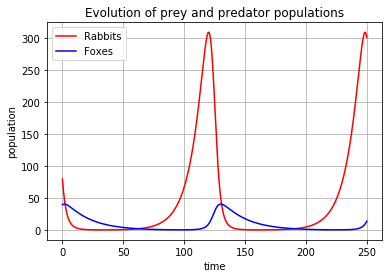

AvrDev_Preys: -3.54968842421
AvrDev_Predators: -0.0924261438132


In [5]:
G.RK4S()
G.SCPS()
print('AvrDev_Preys:', mean(G.resRK[1][0] - G.resSCP[0]))
print('AvrDev_Predators:', mean(G.resRK[1][1] - G.resSCP[1]))